***
## **Project Description :** 

We have chosen the **Conical Spiral curve** as the space curve of our choice. 

The parametric equation of the curve is:

\begin{split}
        & \qquad x = r * t * cos(at)\\
        & \qquad y = r * t *sin(at) \\
        & \qquad z = t
    \end{split}

Where $r = 10$ and $a = 3$ are arbitrarily chosen coefficient values and parameter $t \in (0,20)$

On calulating the curvature and torsion of the curve (using class formulas):

\begin{split}
        \\ \kappa (t)  = \frac{a r\sqrt{4+a^2 t^2+r^2  (2+a^2  t^2)^2}}{(1+r^2 (1+a^2  t^2))^{3/2}}.
\end{split}

\begin{align}
        \tau (t) = \frac{a (6 + a^2  t^2)}{4 + a^2  t^2 + r^2  (2 + a^2 t^2)^2}
\end{align}

#### **In the code below, we have made plots of :**
1. Conical Spiral curve in $3D$ space. 
2. Particle moving along the curve.
3. Plots of tangent, binormal and normal vectors for various paratmeter ($t$) values. 
4. Plots of projections of the curve and TNB vectors on the $XY$, $YZ$ and $XZ$ planes.
5. Plots of curavture ( $\kappa (t)$ ) and torsion ( $\tau (t)$ ) with varying parameter values.
***



---

# **Importing Libraries**

---

In [1]:
## Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from IPython.display import HTML
from IPython import display
import plotly.express as px
import plotly.graph_objects as go

---
## **CONICAL SPIRAL CURVE**

$
Parameterized\ Form:\\
\begin{split}
        & \qquad x = r  t  cos(at)\\
        & \qquad y = r  t sin(at) \\
        & \qquad z = t \\
        {Where:}\\
        & r = 10 \\ 
        & a = 3 \\
        & t \in (0,20)
    \end{split}
$

---

In [2]:
## Function to generate the coordinates of the curve (Conical Spiral) with constants r, a and parameter t.
def getCurveCoordinates(r,a,t):
  x = t*r*np.cos(a*t)
  y = t*r*np.sin(a*t)
  z = t
  return (x,y,z) 

***
### CURVE (AND ROTATING CURVE VIEW) PLOT BY GENERATION OF COORDIANTES USING MATPLOTLIB 
***

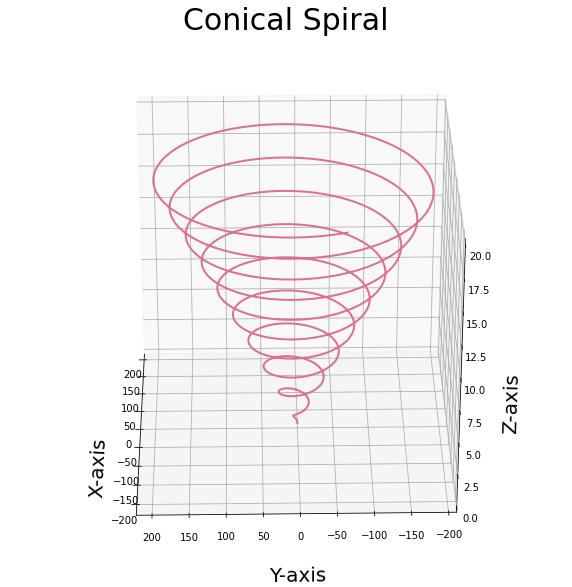

In [3]:
## Plotting the curve and seeing it in different views 
## Making thefigure and axes to plot the curve on 
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

## Initializing the values for r and a coefficients of the curve and range of parameter valus t.
r = 10
a = 3
t = np.linspace(0, 20, 1000)

## Generating the curve coordinates 
(x, y, z) = getCurveCoordinates(r,a,t)

ax.plot(x, y, z, zdir='z', lw=2, color="palevioletred")

## Seeing the different views of the curve
ax.view_init(30, 30)
ax.set_title("Conical Spiral",fontdict={'fontsize':30},pad=50.0)
ax.set_xlabel("X-axis",fontsize=20,labelpad=20)
ax.set_ylabel("Y-axis",fontsize=20,labelpad=20)
ax.set_zlabel("Z-axis",fontsize=20,labelpad=20)
for angle in range(0, 180):
    ax.view_init(30, angle)
    display.display(plt.gcf())
    display.clear_output(wait=True)
plt.show()

***
 #### **INTERACTIVE PLOT OF CURVE USING PLOTLY**

*  `Hovering on the curve will give the (x,y,z) coordinates at that point`

* `We can zoom in / zoom out, rotate and move the plot to view the curve from any viewing plane / angle by using the tools in the top right of the plot`
***

In [4]:
## Plotting the same curve with plotly to see an interactive plot of the curve
fig = px.line_3d(x=x, y=y, z=z)
fig.update_layout(
    title='Interactive Conical Spiral', 
    autosize=False,
    margin=dict(l=65, r=50, b=50, t=60),
    scene=dict(
        xaxis_title='X Axis',
        yaxis_title='Y Axis',
        zaxis_title='Z Axis',
    ),
    title_font=dict(
        size=25
    ),
    title_x = 0.5,
    title_y = 0.9,
    width=700,
    height=700
)
fig.show()

***
#### **ANIMATION VIDEO PLOT FOR POINT MOVING ALONG THE CURVE** 
***

In [5]:
def func(num, dataSet, line):
    line.set_data(np.hstack((dataSet[0:2,:],np.flip(dataSet[0:2, num:],axis=1))))    
    line.set_3d_properties(np.hstack((dataSet[2,:],np.flip(dataSet[2, num:]))))    
    return line

t = np.arange(0,20,0.2)
r = 10
c = 3
t = np.linspace(0, 20, 500)

## Get the coordintes of Curve.
x, y, z = getCurveCoordinates(r, c, t)
dataSet = np.array([x, y, z])
numDataPoints = len(t)

fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
ax.set_title("Particle moving along a Conical Spiral",fontdict={'fontsize':30},pad=20.0)
ax.set_xlabel("X-axis",fontsize=20,labelpad=20)
ax.set_ylabel("Y-axis",fontsize=20,labelpad=20)
ax.set_zlabel("Z-axis",fontsize=20,labelpad=20)

line = plt.plot(dataSet[0], dataSet[1], dataSet[2], 'o-',lw=3, mfc='r', mec='r', markersize=10, markevery=[-1], color="cornflowerblue")[0]

ani = animation.FuncAnimation(fig, func, frames=numDataPoints, fargs=(dataSet,line), interval=25, blit=False)
plt.close()
HTML(ani.to_html5_video())

***
### $${For\ the\ chosen\ Conical\ Spiral\ the\ various\ equations\ are:}$$

Vectors | equations 
---------- | --------------
$$\vec{d1} = \frac{\partial \vec{r}}{\partial s}$$ | $$ (10cos(3s)-30s*sin(3s), 10sin(3s)+30s*cos(3s), 1)$$
$$\vec{d2} = \frac{\partial^2 \vec{r}}{\partial s^2}$$ | $$ (-60sin(3s)-90s*cos(3s), 60cos(3s)-90s*sin(3s), 0 )$$
$$\vec{T}\ (tangent\ vector)$$ | $$ \vec{d1} $$
$$\vec{B}\ (binormal\ vector)$$ | $$ \vec{d1}\times\vec{d2} $$
$$\vec{N}\ (normal\ vector)$$ | $$\vec{B}\times\vec{T}$$
$$\hat{T}\ (unit\ tangent\ veccor)$$ | $$\frac{\vec{T}}{||\vec{T}||}$$
$$\hat{B}\ (unit\ binormal\ vector)$$ | $$\frac{\vec{B}}{||\vec{B}||}$$
$$\hat{N}\ (unit\ normal\ vector)$$ | $$\frac{\vec{N}}{||\vec{N}||}$$

***

***
### **INTERACTIVE PLOT SHOWING HOW THE THREE VECTORS T , N AND B VARY ALONG THE CURVE**
***

In [6]:
# Defining initial parameters and coefficients to generate the curve
t = np.linspace(0, 20, 1000)
r = 10
c = 3

# Getting the curve coordinates 
x, y, z = getCurveCoordinates(r, c, t)
xmin = np.min(x) - 1.5
xmax = np.max(x) + 1.5
ymin = np.min(y) - 1.5
ymax = np.max(y) + 1.5
zmin = np.min(z) - 1.5
zmax = np.max(z) + 1.5

N = 100
s = np.linspace(0, 20, N)
(xx,yy,zz) = getCurveCoordinates(r,c,s)

# defining d1 by taking first derivative of the curve 
d1 =  np.stack([10*np.cos(3*s)-30*s*np.sin(3*s), 10*np.sin(3*s)+30*s*np.cos(3*s), np.ones(len(s))])

# defining d2 by taking second derivative of the curve 
d2 = np.stack([-60*np.sin(3*s)-90*s*np.cos(3*s), 60*np.cos(3*s)-90*s*np.sin(3*s), np.zeros(len(s))]) 
d1 = d1.T
d2 = d2.T

# defining tangent vector t1 of the curve 
tan = d1

# defining binormal vector bin of the curve by taking cross product of d1 and d2
bin = np.cross(d1,d2)

# defining normal vector nor of the curve by taking cross product of binormal vector and tangent vector 
nor = np.cross(bin,tan)

#computing unit tangent vector, unit binormal vector and unit normal vector by diving each by their respective norms
tan = tan/np.reshape(np.linalg.norm(tan,axis=1),(len(tan),1))
bin = bin/np.reshape(np.linalg.norm(bin,axis=1),(len(bin),1))
nor = nor/np.reshape(np.linalg.norm(nor,axis=1),(len(nor),1))


# We can get points on line which passes through point p and parallel to a vector v in parametric form l(t) = p + t*v
# defining (x_tan_end,y_tan_end,z_tan_end) as end points of the tangent using tangent equation.
x_tan_end = xx + 50*tan.T[0]
y_tan_end = yy + 50*tan.T[1]
z_tan_end = zz + 50*tan.T[2]

# defining (x_nor_end,y_nor_end,z_nor_end) as end points of the normal using normal equation.
x_nor_end = xx + 50*nor.T[0]
y_nor_end = yy + 50*nor.T[1]
z_nor_end = zz + 50*nor.T[2]

# defining (z_bin_end,y_bin_end,z_bin_end) as end points of the binormal using binormal equation.
x_bin_end = xx + 4*bin.T[0]
y_bin_end = yy + 4*bin.T[1]
z_bin_end = zz + 4*bin.T[2]

# Create figure
fig = go.Figure(
    data=[go.Scatter3d(x=x, y=y,z=z,
                     name="frame",
                     mode="lines",
                     line=dict(width=3, color="darkcyan")),
          go.Scatter3d(x=x, y=y,z=z,
                     name="curve",
                     mode="lines",
                     line=dict(width=3, color="darkcyan"))
          ],
    layout=go.Layout(width=600, height=600,
                     xaxis=dict(range=[xmin, xmax], autorange=False, zeroline=False),
                     yaxis=dict(range=[ymin, ymax], autorange=False, zeroline=False),
                     title="TNB vectors at various points on the curve",
                     hovermode="closest",
                     updatemenus=[dict(type="buttons",
                                       buttons=[dict(label="Play",
                                                     method="animate",
                                                     args=[None, dict(frame=dict(duration=100), 
                                                             transition=dict(duration=4),
                                                             fromcurrent=True,
                                                             mode='immediate'
                                                            )])])]),
      frames=[go.Frame(data=[go.Scatter3d(
            x=[xx[k], x_tan_end[k],None, xx[k], x_bin_end[k], None, xx[k], x_nor_end[k]],
            y=[yy[k], y_tan_end[k],None, yy[k], y_bin_end[k], None, yy[k], y_nor_end[k]],
            z=[zz[k], z_tan_end[k],None, zz[k], z_bin_end[k], None, zz[k], z_nor_end[k]],
            mode="lines+markers+text",text=[None,"T",None,None,"B",None,None,"N"],textfont=dict(color="darkred",size=12),
            line=dict(color=[ "red", "red", "red", "green", "green", "green", "blue", "blue"], width=3),marker=dict(color="black",size=3, symbol="circle"))
        ]) for k in range(N)]
)

fig.show()

***
* From this animation, we can visualize the  $\vec{T}$, $\vec{N}$ and $\vec{B}$ vectors and how they change with parameter value $(t)$

* **Note:**  The  $\vec{T}$, $\vec{N}$ and $\vec{B}$ vectors in the animation are not unit vectors and are scaled up for better visualization
***

***
**PLOTTING THE 3 POSSIBLE PROJECTION VIEWS OF THE CURVE ON THE X-Y PLANE , Y-Z PLANE AND X-Z PLANE USING MATPLOTLIB** 
***

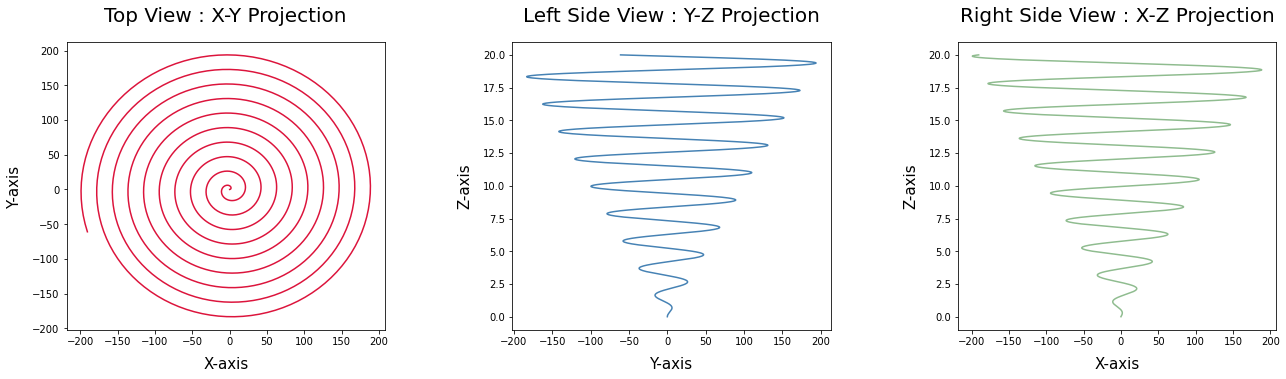

In [7]:
## Plotting the 3 possible views of the curve by creating subplots using matplotlib 
fig, ax = plt.subplots(1,3,figsize=(21,5))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

## X-Y Plane view 
ax[0].plot(x,y, color="crimson")
ax[0].set_title("Top View : X-Y Projection",fontdict={'fontsize':20},pad=20.0)
ax[0].set_xlabel("X-axis",fontsize=15,labelpad=10)
ax[0].set_ylabel("Y-axis",fontsize=15,labelpad=10)

## Y-Z Plane view
ax[1].plot(y,z, color="steelblue")
ax[1].set_title("Left Side View : Y-Z Projection",fontdict={'fontsize':20},pad=20.0)
ax[1].set_xlabel("Y-axis",fontsize=15,labelpad=10)
ax[1].set_ylabel("Z-axis",fontsize=15,labelpad=10)

## X-Z Plane view
ax[2].plot(x,z,color="darkseagreen")
ax[2].set_title("Right Side View : X-Z Projection",fontdict={'fontsize':20},pad=20.0)
ax[2].set_xlabel("X-axis",fontsize=15,labelpad=10)
ax[2].set_ylabel("Z-axis",fontsize=15,labelpad=10)

plt.show()

***
**Plotting interactive plot of T N B vector projections on X-Y, Y-Z and X-Z planes as particle moves along the curve using Plotly.** 
***

In [8]:
# Create figure

fig = go.Figure(
    data=[go.Scatter(x=x, y=y,
                     mode="lines",
                     line=dict(width=3, color="palevioletred")),
          go.Scatter(x=x, y=y,
                     mode="lines",
                     line=dict(width=3, color="palevioletred"))],
    layout=go.Layout(
        xaxis=dict(range=[xmin, xmax], autorange=False, zeroline=False,title="X-Axis"),
        yaxis=dict(range=[ymin, ymax], autorange=False, zeroline=False,title="Y-Axis"),
        title='Interactive X-Y Projection with TNB Vectors', 
        title_font=dict(
            size=25
        ),
        title_x = 0.5,
        height = 700,
        width = 800,
        autosize=False,
        margin=dict(l=65, r=50, b=50, t=60),
        hovermode="closest",
        updatemenus=[dict(type="buttons",
                          buttons=[dict(label="Play",
                                        method="animate",
                                        args=[None, dict(frame=dict(duration=75), 
                                                             transition=dict(duration=4),
                                                             fromcurrent=True,
                                                             mode='immediate'
                                                            )])])]),
    frames=[go.Frame(
        data=[go.Scatter(
            x=[xx[k], x_tan_end[k],None, xx[k], x_bin_end[k], None, xx[k], x_nor_end[k]],
            y=[yy[k], y_tan_end[k],None, yy[k], y_bin_end[k], None, yy[k], y_nor_end[k]],
            
            mode="lines+markers",
            line=dict(color="seagreen", width=3),
            marker=dict(color="black",size=5,symbol="circle"))])

        for k in range(N)]
)
fig.show()

In [9]:
# Create figure
fig = go.Figure(
    data=[go.Scatter(x=y, y=z,
                     mode="lines",
                     line=dict(width=3, color="steelblue")),
          go.Scatter(x=y, y=z,
                     mode="lines",
                     line=dict(width=3, color="steelblue"))],
    layout=go.Layout(
        xaxis=dict(range=[ymin, ymax], autorange=False, zeroline=False,title="Y-Axis"),
        yaxis=dict(range=[zmin, zmax], autorange=False, zeroline=False,title="Z-Axis"),
        hovermode="closest",
        title='Interactive Y-Z Projection with TNB Vectors', 
        autosize=False,
        margin=dict(l=65, r=50, b=50, t=60),
        title_font=dict(
            size=25
        ),
        title_x = 0.5,
        height = 700,
        width = 800,
        updatemenus=[dict(type="buttons",
                          buttons=[dict(label="Play",
                                        method="animate",
                                        args=[None, dict(frame=dict(duration=75), 
                                                             transition=dict(duration=4),
                                                             fromcurrent=True,
                                                             mode='immediate'
                                                            )])])]),
    frames=[go.Frame(
        data=[go.Scatter(
            x=[yy[k], y_tan_end[k],None, yy[k], y_bin_end[k], None, yy[k], y_nor_end[k]],
            y=[zz[k], z_tan_end[k],None, zz[k], z_bin_end[k], None, zz[k], z_nor_end[k]],
            
            mode="lines+markers",
            line=dict(color="orange", width=3),
            marker=dict(color="black",size=5,symbol="circle"))])

        for k in range(N)]
)
fig.show()

In [10]:
# Create figure
fig = go.Figure(
    data=[go.Scatter(x=x, y=z,
                     mode="lines",
                     line=dict(width=3, color="teal")),
          go.Scatter(x=x, y=z,
                     mode="lines",
                     line=dict(width=3, color="teal"))],
    layout=go.Layout(
        xaxis=dict(range=[xmin, xmax], autorange=False, zeroline=False,title="X-Axis"),
        yaxis=dict(range=[zmin, zmax], autorange=False, zeroline=False,title="Z-Axis"),
        title='Interactive X-Z Projection with TNB Vectors', 
        autosize=False,
        margin=dict(l=65, r=50, b=50, t=60),
        title_font=dict(
            size=25
        ),
        title_x = 0.5,
        height = 700,
        width = 1000,
        hovermode="closest",
        updatemenus=[dict(type="buttons",
                          buttons=[dict(label="Play",
                                        method="animate",
                                        args=[None, dict(frame=dict(duration=75), 
                                                             transition=dict(duration=4),
                                                             fromcurrent=True,
                                                             mode='immediate'
                                                            )])])]),
    frames=[go.Frame(
        data=[go.Scatter(
            x=[xx[k], x_tan_end[k],None, xx[k], x_bin_end[k], None, xx[k], x_nor_end[k]],
            y=[zz[k], z_tan_end[k],None, zz[k], z_bin_end[k], None, zz[k], z_nor_end[k]],
            
            mode="lines+markers",
            line=dict(color="tomato", width=3),
            marker=dict(color="black",size=5,symbol="circle"))])

        for k in range(N)]
)
fig.show()

***
#### **Plot of K(Curvature Value) v/s T(Parameter Value)**
***

***
**CURAVTURE OF THE CONCIAL SPIRAL CURVE :**


\begin{equation}
\begin{split}
        \\ \kappa (t)  = \frac{a r\sqrt{4+a^2 t^2+r^2  (2+a^2  t^2)^2}}{(1+r^2 (1+a^2  t^2))^{3/2}}.
\end{split}
\end{equation}
***







In [11]:
## Function to calculate the curvature of the Conical spiral curve.
def getCurveCurvature(r, a, t):
  num = a*r*np.sqrt(4+a**2 * t**2+r**2 * (2+a**2 * t**2)**2)
  den = (1+r**2 * (1+a**2 * t**2))**(1.5)
  k = num/den
  return k

In [12]:
## Plotiing of interactive curve b/w Curvature(k) and Parameter value(t).
r = 10
a = 3
t = np.linspace(0, 20, 1000)
k = getCurveCurvature(r,a, t)

x=t
y=k
xmin = np.min(x) - 1.5
xmax = np.max(x) + 1.5
ymin = np.min(y) - 0.01
ymax = np.max(y) + 0.01
N = 200
s = np.linspace(0, 20, N)
xx = s
yy = getCurveCurvature(r,a,s)

fig = go.Figure(
    data=[go.Scatter(x=x, y=y,
                     mode="lines",
                     line=dict(width=3, color="teal")),
          go.Scatter(x=x, y=y,
                     mode="lines",
                     line=dict(width=3, color="teal"))],
    layout=go.Layout(
        xaxis=dict(range=[xmin, xmax], autorange=False, zeroline=False,title="Parameter Value"),
        yaxis=dict(range=[ymin, ymax], autorange=False, zeroline=False,title="Curvature"),
        title='Interactive Curvature vs Parameter plot', 
        autosize=False,
        margin=dict(l=65, r=50, b=50, t=60),
        title_font=dict(
            size=25
        ),
        title_x = 0.5,
        height = 500,
        width = 700,
        hovermode="closest",
        updatemenus=[dict(type="buttons",
                          buttons=[dict(label="Play",
                                        method="animate",
                                        args=[None, dict(frame=dict(duration=50), 
                                                             transition=dict(duration=4),
                                                             fromcurrent=True,
                                                             mode='immediate'
                                                            )])])]),
    frames=[go.Frame(
        data=[go.Scatter(
            x=[xx[k]],
            y=[yy[k]],
            mode="markers",
            marker=dict(color="black", size=10))])

        for k in range(N)]
)
fig.show()

***
* In the above plot, we can see that for smaller values of parameter t, the curvature value is large and for larger values of parameter t, the curvature value is small. i.e $\kappa  \propto \frac{1}{t}$.
* This implies that for small values of t, the radius of curvature $R = 1/K$ is small and vice versa.
* By looking at the projection in the $XY$ plane, we can see that this result is as expected because initially the radius of the spiral is small and it gradually increases.
***

### **Plot of Torsion v/s t(Parameter Value)**

***
**TORSION OF THE CONCIAL SPIRAL CURVE :**



\begin{align}
        \tau (t) = \frac{a (6 + a^2  t^2)}{4 + a^2  t^2 + r^2  (2 + a^2 t^2)^2}
\end{align}
***

In [13]:
## Function to calculate the Torsion of the Conical spiral curve.
def getCurveTorsion(r,a,t):
  num = a * (6 + a**2 * t**2)
  den = 4 + a**2 * t**2 + r**2 * (2 + a**2 * t**2)**2
  k = num/den
  return k

In [14]:
## Plotting of Interactive curve b/w Torsion(tou) v/s parameter value(t).
r = 10
a = 3
t = np.linspace(0, 20, 1000)
tou = getCurveTorsion(r, a, t)

x=t
y=tou
xmin = np.min(x) - 1.5
xmax = np.max(x) + 1.5
ymin = np.min(y) - 0.01
ymax = np.max(y) + 0.01
N = 200
s = np.linspace(0, 20, N)
xx = s
yy = getCurveTorsion(r,a,s)


fig = go.Figure(
    data=[go.Scatter(x=x, y=y,
                     mode="lines",
                     line=dict(width=3, color="cyan")),
          go.Scatter(x=x, y=y,
                     mode="lines",
                     line=dict(width=3, color="cyan"))],
    layout=go.Layout(
        xaxis=dict(range=[xmin, xmax], autorange=False, zeroline=False,title="Parameter Value"),
        yaxis=dict(range=[ymin, ymax], autorange=False, zeroline=False,title="Curvature"),
        title='Interactive Torsion vs Parameter plot', 
        autosize=False,
        margin=dict(l=65, r=50, b=50, t=60),
        title_font=dict(
            size=25
        ),
        title_x = 0.5,
        height = 500,
        width = 700,
        hovermode="closest",
        updatemenus=[dict(type="buttons",
                          buttons=[dict(label="Play",
                                        method="animate",
                                        args=[None, dict(frame=dict(duration=50), 
                                                             transition=dict(duration=4),
                                                             fromcurrent=True,
                                                             mode='immediate'
                                                            )])])]),
    frames=[go.Frame(
        data=[go.Scatter(
            x=[xx[k]],
            y=[yy[k]],
            mode="markers",
            marker=dict(color="black", size=10))])

        for k in range(N)]
)
fig.show()

***
* In the above plot, we can see that for smaller values of parameter $t$, the torsion value is large and for larger values of parameter $t$, the torsion value is small. 
* By looking at the projections in the $XZ$ and $YZ$ planes, we can see that this result is as expected because for smaller values of $t$, the rate at which the particle on the curve moves away from the $XY$ plane is more and for larger values of $t$ it is less. 
***

***
### **Team Number : 13**

1. Aditya Jain   : 1903102
2. Adwait Agashe : 1903103
3. Svara Mehta   : 1906337

***